In [1]:
import os
import pandas as pd
import numpy
import datetime
import matplotlib as plt
%matplotlib inline

In [2]:
#load dataset
file_path = os.getcwd() + "\\nfl_games.csv"
nfl_df = pd.read_csv(file_path)
nfl_df['date'] = nfl_df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

print(nfl_df.dtypes)

date         datetime64[ns]
season                int64
neutral               int64
playoff               int64
team1                object
team2                object
elo1                float64
elo2                float64
elo_prob1           float64
score1                int64
score2                int64
result1             float64
dtype: object


In [3]:
nfl_df_1980_2017 = nfl_df[['season','neutral','playoff','team1','team2','score1','score2']]
nfl_df_1980_2017 = nfl_df_1980_2017[ nfl_df_1980_2017['season'] >= 1980 ]
nfl_df_1980_2017['score1_digit'] = nfl_df_1980_2017['score1'].apply(lambda x: x%10)
nfl_df_1980_2017['score2_digit'] = nfl_df_1980_2017['score2'].apply(lambda x: x%10)

#nfl_df_1980_2017 = nfl_df_1980_2017[ nfl_df_1980_2017['neutral'] == 1 ]
#nfl_df_1980_2017 = nfl_df_1980_2017[ (nfl_df_1980_2017['team1'] == 'NE') | (nfl_df_1980_2017['team2'] == 'NE') | (nfl_df_1980_2017['team1'] == 'LAR') | (nfl_df_1980_2017['team2'] == 'NLAR') ]

#print(nfl_df_1980_2017[0:10])

score1 = nfl_df_1980_2017['score1_digit'].tolist()
score2 = nfl_df_1980_2017['score2_digit'].tolist()

#print(score1[0:30])
#print(score2[0:30])

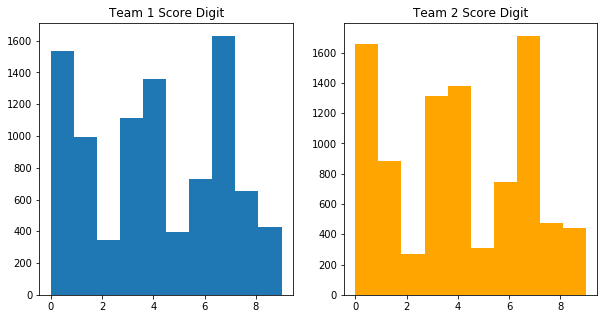

In [4]:
plt.pyplot.figure(figsize=(10,5))

plt.pyplot.subplot(1,2,1)
plt.pyplot.hist(score1, bins = 10, alpha=1, label='Score 1')
plt.pyplot.title('Team 1 Score Digit')

plt.pyplot.subplot(1,2,2)
plt.pyplot.hist(score2, bins = 10, alpha=1, color='orange', label='Score 2')
plt.pyplot.title('Team 2 Score Digit')

plt.pyplot.show()    

In [6]:
set_list = []
for i in range(0,len(score1)):
    set_list.append( (score1[i], score2[i]) )

#print(set_list[0:50])

d = {}
for x in set_list:
    d[x] = d.get(x, 0) + 1

    
#for w in sorted(d, key=d.get, reverse=True):
#    print(w, d[w])
    
#print(d)

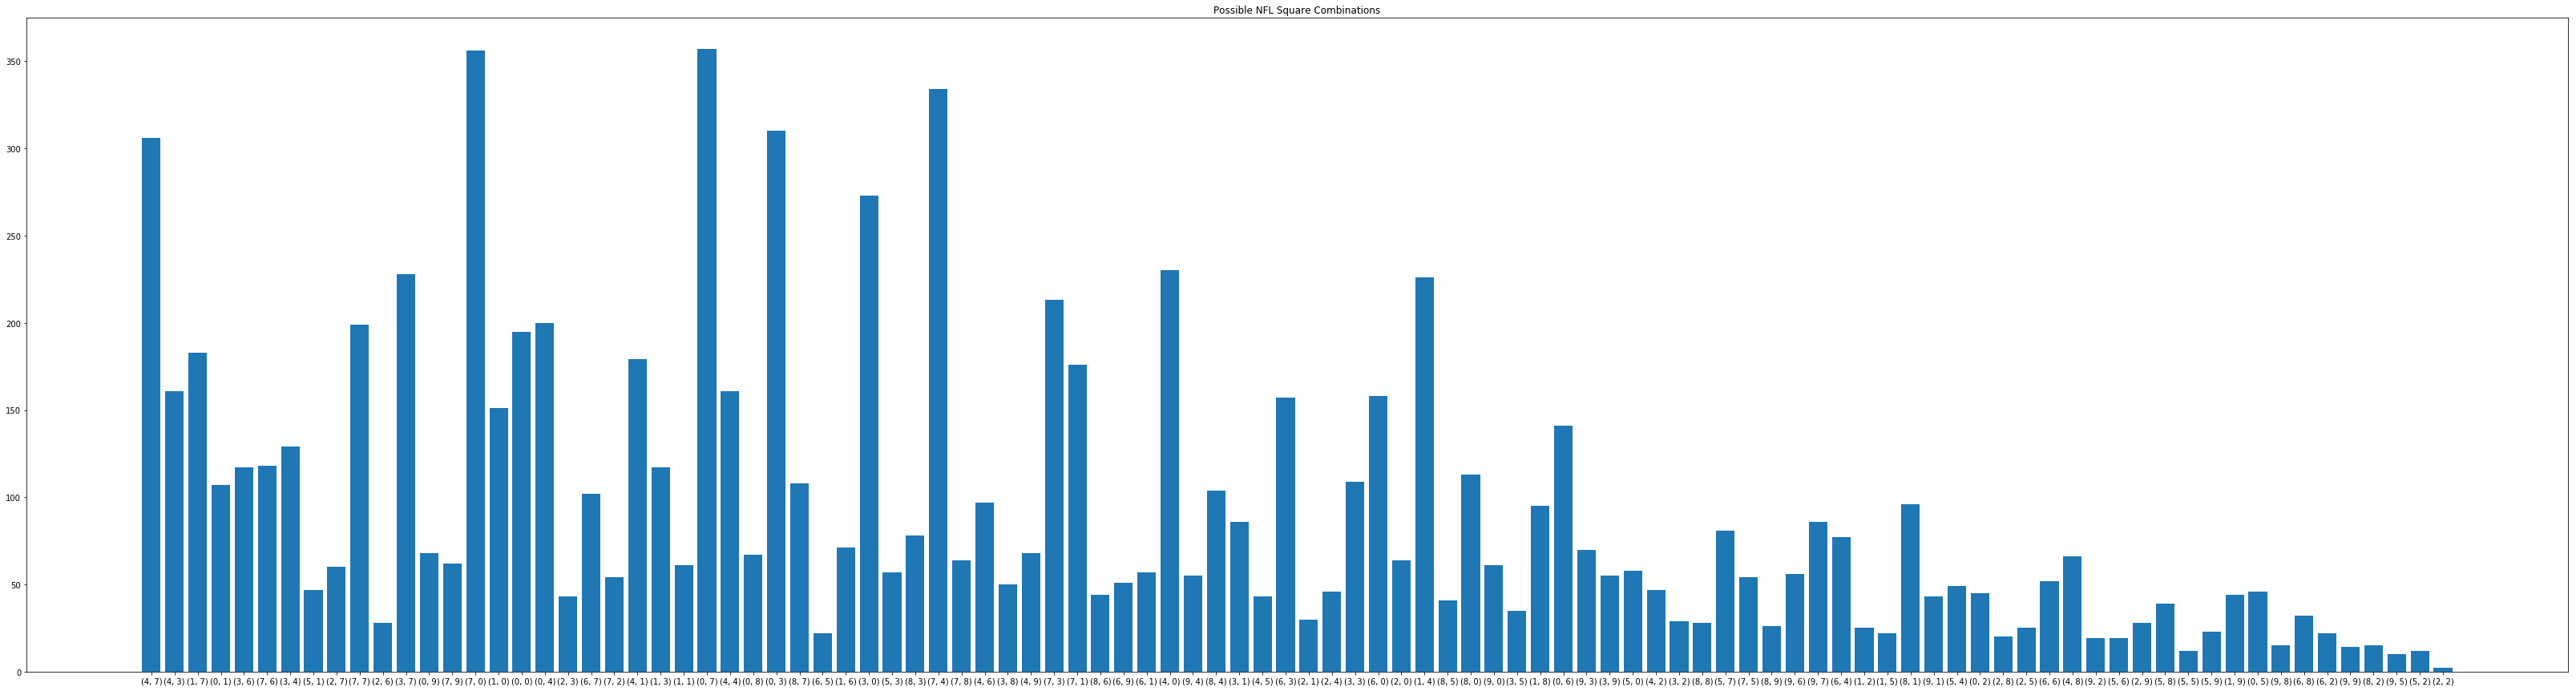

In [7]:
value_list = [] #in same order as traversing keys
key_list = [] #also needed to preserve order
for key in d.keys():
    key_list.append(str(key))
    value_list.append(d[key])
    
#print(key_list[0:10])
#print(value_list[0:10])
    
plt.pyplot.figure(figsize=(125,15))

plt.pyplot.subplot(1,2,1)
plt.pyplot.bar(key_list, value_list)
plt.pyplot.title('Possible NFL Square Combinations')

plt.pyplot.show()
